In [2]:
import sys
print(sys.executable)

/home/dataeng/Student_Performance_Prediction/SPP_env/bin/python


In [18]:
import pandas as pd

df = pd.read_csv("../data/raw/student_performance_prediction.csv")
df.head()



,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()


Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [13]:
df['Student ID'].duplicated().sum() # checking if Student ID is primary key


np.int64(0)

In [14]:
# other way to chack if student ID is unique 
total_students = df['Student ID'].nunique()
total_rows = len(df)
print(f"Unique Student IDs: {total_students}, Total Rows: {total_rows}")


Unique Student IDs: 40000, Total Rows: 40000


In [19]:
# Because Student ID is unique, I made it index column
df.set_index('Student ID', inplace=True)
df.head()


,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
Student ID,,,,,,
S00001,12.5,NaN,75.0,Yes,Master,Yes
S00002,9.3,95.3,60.6,No,High School,No
S00003,13.2,NaN,64.0,No,Associate,No
S00004,17.6,76.8,62.4,Yes,Bachelor,No
S00005,8.8,89.3,72.7,No,Master,No


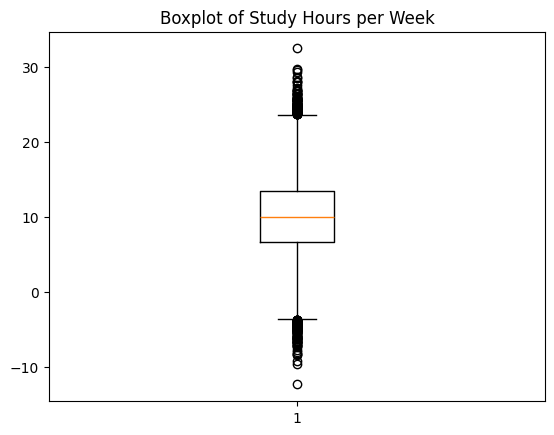

In [24]:
# to find out if there is any outliner. because which one should be used mean or median ?
import matplotlib.pyplot as plt
# Create a boxplot for 'Study Hours per Week'
plt.boxplot(df['Study Hours per Week'].dropna())
plt.title('Boxplot of Study Hours per Week')
plt.show()



In [23]:
Q1 = df['Study Hours per Week'].quantile(0.25)  # First quartile (25%)
Q3 = df['Study Hours per Week'].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile Range

# Calculate the bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers_iqr = df[(df['Study Hours per Week'] < lower_bound) | 
                  (df['Study Hours per Week'] > upper_bound)]
print("Number of outliers in 'Study Hours per Week' using IQR:", len(outliers_iqr))
display(outliers_iqr)


Number of outliers in 'Study Hours per Week' using IQR: 251


,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
Student ID,,,,,,
S00210,29.3,NaN,55.1,Yes,Bachelor,Yes
S00263,-6.2,98.7,26.2,Yes,High School,Yes
S00479,25.4,84.5,53.0,No,High School,Yes
S01062,-4.2,70.8,46.3,No,Master,No
S01540,-4.4,77.7,54.0,No,Bachelor,No
...,...,...,...,...,...,...
S39500,-4.2,57.0,33.3,NaN,Master,No
S39528,-4.5,66.9,73.7,No,High School,No
S39576,24.3,61.8,48.0,No,Associate,No


In [ ]:
# Step 1: Calculate the mean without the outliers
Q1 = df['Study Hours per Week'].quantile(0.25)
Q3 = df['Study Hours per Week'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the filtered mean without the outliers
filtered_mean = df[(df['Study Hours per Week'] >= lower_bound) & 
                   (df['Study Hours per Week'] <= upper_bound)]['Study Hours per Week'].mean()

print(f"Filtered Mean (excluding outliers): {filtered_mean:.2f}")

# Step 2: Impute NaN values in 'Study Hours per Week' with the filtered mean
df['Study Hours per Week'].fillna(filtered_mean, inplace=True)

# Step 3: Review the changes
print("Updated 'Study Hours per Week' column after imputation:")
print(df['Study Hours per Week'].head(10))
